#Importing Dependencies

In [ ]:
!pip install -U transformers tensorflow tf-keras tensorflow_addons contractions emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import gdown
import contractions
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import gc
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from transformers import AdamWeightDecay, TFBertModel, BertConfig, BertTokenizer ,InputExample, InputFeatures ,TFBertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,ModelCheckpoint
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision, Recall
from google.colab import files
import warnings
import time
import os
from datetime import datetime
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Bidirectional, Attention,
                                     GlobalAveragePooling1D, Embedding ,BatchNormalization ,SpatialDropout1D,
                                     Reshape, Activation, GlobalMaxPooling1D, Concatenate)

In [ ]:
# Ensure punkt is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.19.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heshamalsaadi","key":"3668e4ef1bf41df07b27db2cec059f92"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Loading Datasets

##Sentiment140 dataset with 1.6 million tweets

In [ ]:
# Replace 'your_shareable_link' with the actual shareable link
file_url = 'https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA'
output = 'training.1600000.processed.noemoticon.csv'
gdown.download(file_url, output, quiet=False)

Downloading...
From (original): https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA
From (redirected): https://drive.google.com/uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA&confirm=t&uuid=2b07d437-0d6b-4575-a1dc-56fff8fcd09c
To: /content/training.1600000.processed.noemoticon.csv
100%|██████████| 239M/239M [00:04<00:00, 58.0MB/s]


'training.1600000.processed.noemoticon.csv'

In [ ]:
file_path = '/content/training.1600000.processed.noemoticon.csv'
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]

In [ ]:
# Load the CSV file into a DataFrame
df_Sentiment140_dataset = pd.read_csv(file_path, encoding='ISO-8859-1', names=DATASET_COLUMNS)
df_Sentiment140_dataset = df_Sentiment140_dataset.drop(['ids', 'date', 'flag', 'user'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df_Sentiment140_dataset.sentiment = df_Sentiment140_dataset.sentiment.apply(lambda x: label_decoder(x))
df_Sentiment140_dataset = df_Sentiment140_dataset[['text', 'sentiment']]
df_Sentiment140_dataset

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,Positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,Positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,Positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Positive


##IMDB Vision and NLP

In [ ]:
!kaggle datasets download -d raynardj/imdb-vision-and-nlp

Dataset URL: https://www.kaggle.com/datasets/raynardj/imdb-vision-and-nlp
License(s): GPL-2.0
 91% 381M/420M [00:00<00:00, 406MB/s]
100% 420M/420M [00:02<00:00, 151MB/s]


In [ ]:
!unzip imdb-vision-and-nlp.zip

Archive:  imdb-vision-and-nlp.zip
  inflating: __notebook_source__.ipynb  
  inflating: images/images/100029_.jpg  
  inflating: images/images/1000774_.jpg  
  inflating: images/images/100114_.jpg  
  inflating: images/images/1001508_.jpg  
  inflating: images/images/100150_.jpg  
  inflating: images/images/1001526_.jpg  
  inflating: images/images/100157_.jpg  
  inflating: images/images/100258_.jpg  
  inflating: images/images/100260_.jpg  
  inflating: images/images/100318_.jpg  
  inflating: images/images/100403_.jpg  
  inflating: images/images/100404_.jpg  
  inflating: images/images/100405_.jpg  
  inflating: images/images/100502_.jpg  
  inflating: images/images/100507_.jpg  
  inflating: images/images/1007028_.jpg  
  inflating: images/images/1007029_.jpg  
  inflating: images/images/100758_.jpg  
  inflating: images/images/100802_.jpg  
  inflating: images/images/100814_.jpg  
  inflating: images/images/100935_.jpg  
  inflating: images/images/100944_.jpg  
  inflating: image

In [ ]:
file_path = '/content/reviews.csv'
df_IMDB = pd.read_csv(file_path)
df_IMDB

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),8.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","['0', '1']"
1,rw1133959,lost-in-limbo,Feardotcom (2002),3.0,"""I couldn't make much sense of it myself"". Too...",24 July 2005,0,There's a Website called FearDotCom and anyone...,"['1', '4']"
2,rw1133985,NateManD,Persona (1966),10.0,Persona gives me all the reasons to love art-h...,24 July 2005,0,"Long before ""Muholland Drive"" there was anothe...","['9', '23']"
3,rw1133999,CAMACHO-4,War of the Worlds (2005),3.0,A disappointing film from the team that you Mi...,24 July 2005,0,Spielberg said this film is based on the H.G. ...,"['9', '14']"
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']"
...,...,...,...,...,...,...,...,...,...
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']"
542457,rw1012555,zardoz-13,Coach Carter (2005),8.0,"""Coach Carter"" makes the grade!!!",2 February 2005,1,Every conscientious high school educator ought...,"['0', '1']"
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']"
542459,rw1012561,philip_vanderveken,Garfield (2004),4.0,This has nothing to do with the cartoon cat th...,2 February 2005,0,I've known the Garfield comic all my life (Gar...,"['2', '5']"


In [ ]:
# Filter rows where rating is between 4 and 7
df_IMDB_filtered = df_IMDB[(df_IMDB['rating'] >= 4) & (df_IMDB['rating'] <= 7)]
df_IMDB_filtered['sentiment'] = 'neutral'

<ipython-input-14-c351528fde19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMDB_filtered['sentiment'] = 'neutral'


In [ ]:
# Check the unique values in the 'rating' column
print(df_IMDB_filtered['rating'].unique())

# Check the shape of the filtered DataFrame
print(df_IMDB_filtered.shape)
df_IMDB_filtered

[6. 7. 4. 5.]
(203945, 10)


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,sentiment
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']",neutral
5,rw1134035,cshep,Christine (1983),7.0,Bullied Student Gets REVENGE !!!,24 July 2005,1,Joh Carpenter directs this early 80's Stephen ...,"['1', '1']",neutral
12,rw1134121,sol-,The Upside of Anger (2005),4.0,My brief review of the film,24 July 2005,0,Aggression is something that many of us have n...,"['1', '2']",neutral
14,rw1134149,sol-,Anything Else (2003),7.0,My brief review of the film,24 July 2005,0,This may not be as funny or as deep as some of...,"['5', '9']",neutral
16,rw1134153,ma-cortes,The Alamo (2004),7.0,Interesting rendition of the mythic Alamo miss...,24 July 2005,0,Epic western upon the state of Texas's fight f...,"['20', '21']",neutral
...,...,...,...,...,...,...,...,...,...,...
542454,rw1012547,Bob-45,Shenandoah (1965),7.0,Weakened By Production Values and Coincidence,2 February 2005,0,Charley Anderson (James Stewart) is the widowe...,"['8', '17']",neutral
542455,rw1012551,mjw2305,Sphere (1998),5.0,Cheat!,2 February 2005,1,"With a good cast, a writer with a pedigree and...","['2', '5']",neutral
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']",neutral
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']",neutral


In [ ]:
df_IMDB_filtered = df_IMDB_filtered.drop(['review_id', 'reviewer', 'movie', 'review_date','spoiler_tag','helpful', 'review_summary', 'rating'], axis=1)
df_IMDB_filtered.rename(columns={'review_detail': 'text'}, inplace=True)
df_IMDB_filtered

,text,sentiment
4,"Director Doug Liman, who's gotten famous for m...",neutral
5,Joh Carpenter directs this early 80's Stephen ...,neutral
12,Aggression is something that many of us have n...,neutral
14,This may not be as funny or as deep as some of...,neutral
16,Epic western upon the state of Texas's fight f...,neutral
...,...,...
542454,Charley Anderson (James Stewart) is the widowe...,neutral
542455,"With a good cast, a writer with a pedigree and...",neutral
542456,Stepmom gets off to quite a promising start. L...,neutral
542458,You know when a movie is in trouble when its f...,neutral


###Deleting Unwated Files and Folders

In [ ]:
import os

# List all files and folders in the current directory
for root, dirs, files in os.walk('.'):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

./kaggle.json
./imdb-vision-and-nlp.zip
./__notebook_source__.ipynb
./training.1600000.processed.noemoticon.csv
./movies.csv
./reviews.csv
./.config
./images
./sample_data
./.config/.last_survey_prompt.yaml
./.config/config_sentinel
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/default_configs.db
./.config/.last_update_check.json
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/logs
./.config/configurations
./.config/logs/2025.06.05
./.config/logs/2025.06.05/13.37.50.659801.log
./.config/logs/2025.06.05/13.37.29.893875.log
./.config/logs/2025.06.05/13.38.10.544873.log
./.config/logs/2025.06.05/13.37.59.873672.log
./.config/logs/2025.06.05/13.38.01.160966.log
./.config/logs/2025.06.05/13.38.11.288440.log
./.config/configurations/config_default
./images/images
./images/images/88194_.jpg
./images/images/2911666_.jpg
./images/images/113987_.jpg
./images/images/411061_.jpg
./images/images/71249_.jpg
./images/images/16878

In [ ]:
# List of files to delete
files_to_delete = ['__notebook_source__.ipynb', 'movies.csv', 'imdb-vision-and-nlp.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: __notebook_source__.ipynb
Deleted: movies.csv
Deleted: imdb-vision-and-nlp.zip


In [ ]:
import shutil

# List of folders to delete
folders_to_delete = ['images']

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted: {folder}")
    else:
        print(f"Folder not found: {folder}")

Deleted: images


##Twitter Sentiment Dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.60M [00:00<?, ?B/s]
100% 7.60M/7.60M [00:00<00:00, 957MB/s]


In [ ]:
!unzip twitter-sentiment-dataset.zip

Archive:  twitter-sentiment-dataset.zip
  inflating: Twitter_Data.csv        


In [ ]:
import os
# List of files to delete
files_to_delete = ['twitter-sentiment-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-sentiment-dataset.zip


In [ ]:
file_path = '/content/Twitter_Data.csv'
df_Twitter_Data = pd.read_csv(file_path)
df_Twitter_Data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_Twitter_Data_filtered = df_Twitter_Data[(df_Twitter_Data['category'] == 0)]
df_Twitter_Data_filtered['sentiment'] = 'neutral'
df_Twitter_Data_filtered = df_Twitter_Data_filtered.drop(['category'], axis=1)
df_Twitter_Data_filtered.rename(columns={'clean_text': 'text'}, inplace=True)
df_Twitter_Data_filtered

<ipython-input-24-329104fbb381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Twitter_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
1,talk all the nonsense and continue all the dra...,neutral
5,kiya tho refresh maarkefir comment karo,neutral
6,surat women perform yagna seeks divine grace f...,neutral
7,this comes from cabinet which has scholars lik...,neutral
13,one vote can make all the difference anil kapo...,neutral
...,...,...
162968,case dont look candidate then that case person...,neutral
162971,congress veteran sudhakar reddy joins bjp afte...,neutral
162974,save your agenda peddling ’ had with terror at...,neutral
162977,did you cover her interaction forum where she ...,neutral


##Reddit Sentimental analysis Dataset

In [ ]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/10.0M [00:00<?, ?B/s]
100% 10.0M/10.0M [00:00<00:00, 1.14GB/s]


In [ ]:
!unzip twitter-and-reddit-sentimental-analysis-dataset.zip
#Answer (n)

Archive:  twitter-and-reddit-sentimental-analysis-dataset.zip
  inflating: Reddit_Data.csv         
replace Twitter_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# List of files to delete
files_to_delete = ['twitter-and-reddit-sentimental-analysis-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-and-reddit-sentimental-analysis-dataset.zip


In [ ]:
file_path = '/content/Reddit_Data.csv'
df_Reddit_Data = pd.read_csv(file_path)
df_Reddit_Data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df_Reddit_Data_filtered = df_Reddit_Data[(df_Reddit_Data['category'] == 0)]
df_Reddit_Data_filtered['sentiment'] = 'neutral'
df_Reddit_Data_filtered = df_Reddit_Data_filtered.drop(['category'], axis=1)
df_Reddit_Data_filtered.rename(columns={'clean_comment': 'text'}, inplace=True)
df_Reddit_Data_filtered

<ipython-input-29-0fe9c9de3561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Reddit_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
3,what you have learned yours and only yours wha...,neutral
7,jesus was zen meets jew,neutral
18,zarus,neutral
19,blood and souls for lord arioch,neutral
25,his name shall lump wherever lumps are there w...,neutral
...,...,...
37241,let the janta decide not ulema clerics,neutral
37242,hona hai same with vaccination education insu...,neutral
37244,jesus,neutral
37246,downvote karna tha par upvote hogaya,neutral


##Emotions Dataset

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
  0% 0.00/15.7M [00:00<?, ?B/s]
100% 15.7M/15.7M [00:00<00:00, 1.17GB/s]


In [ ]:
!unzip emotions.zip

Archive:  emotions.zip
  inflating: text.csv                


In [ ]:
# List of files to delete
files_to_delete = ['emotions.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: emotions.zip


In [ ]:
file_path = '/content/text.csv'
df_emotions = pd.read_csv(file_path)
df_emotions

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
df_emotions_filtered = df_emotions[(df_emotions['label'] >= 1) & (df_emotions['label'] <= 4)]
df_emotions_filtered['sentiment'] = 'neutral'
df_emotions_filtered = df_emotions_filtered.drop(['label', 'Unnamed: 0'], axis=1)
df_emotions_filtered

<ipython-input-34-f62441a5aec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emotions_filtered['sentiment'] = 'neutral'


,text,sentiment
0,i just feel really helpless and heavy hearted,neutral
2,i gave up my internship with the dmrg and am f...,neutral
4,i am a kindergarten teacher and i am thoroughl...,neutral
6,i would think that whomever would be lucky eno...,neutral
7,i fear that they won t ever feel that deliciou...,neutral
...,...,...
416802,i feel like i have been neglecting you my fait...,neutral
416803,i cry and feel a sense of loss when my patient...,neutral
416804,i feel like telling these horny devils to find...,neutral
416805,i began to realize that when i was feeling agi...,neutral


##Twitter Sentiment Analysis Dataset

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 141MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
# List of files to delete
files_to_delete = ['twitter-entity-sentiment-analysis.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-entity-sentiment-analysis.zip


In [ ]:
file_path = '/content/twitter_training.csv'
df_twitter_training = pd.read_csv(file_path)
print(df_twitter_training.columns)
df_twitter_training

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
file_path = '/content/twitter_validation.csv'
df_twitter_validation = pd.read_csv(file_path)
print(df_twitter_validation.columns)
df_twitter_validation

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Remove column names (reset to default numeric index)
df_twitter_training.columns = range(df_twitter_training.shape[1])  # Reset column names to 0, 1, 2, ...
df_twitter_validation.columns = range(df_twitter_validation.shape[1])  # Reset column names to 0, 1, 2, ...

In [ ]:
# Combine the DataFrames
combined_df = pd.concat([df_twitter_training, df_twitter_validation], ignore_index=True)

# Add meaningful column names
combined_df.columns = ['id', 'ni', 'rate', 'text']

print("Combined DataFrame with meaningful column names:")
combined_df

Combined DataFrame with meaningful column names:


,id,ni,rate,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df_combined_twitter_filtered = combined_df[(combined_df['rate'] == 'Neutral')]
df_combined_twitter_filtered['sentiment'] = 'neutral'
df_combined_twitter_filtered = df_combined_twitter_filtered.drop(['rate', 'ni', 'id'], axis=1)
df_combined_twitter_filtered

<ipython-input-29-2750cd53c734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_twitter_filtered['sentiment'] = 'neutral'


,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


In [ ]:
df_combined_twitter_filtered

,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


------------------------------------------------------------------------------------

#Dataset Preprocessing

In [ ]:
'''
df_combined_twitter_filtered
df_emotions_filtered x
df_Reddit_Data_filtered
df_Twitter_Data_filtered
df_IMDB_filtered x
df_Sentiment140_dataset
'''
all_data_df = pd.concat([df_combined_twitter_filtered, df_emotions_filtered, df_Reddit_Data_filtered, df_Twitter_Data_filtered,
                         df_IMDB_filtered, df_Sentiment140_dataset], ignore_index=True)
all_data_df_shuffled = all_data_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_data_df_shuffled

,text,sentiment
0,me cleaan,Positive
1,@roborobb I call them gladiator sandals,Positive
2,@tylerosby I tried to test it out but you answ...,Positive
3,"C'mon pple, let's start writing this app BPD",Positive
4,@egower Awww thank you for the #ff &lt;3!!! I...,Negative
...,...,...
1668350,Watching the tonight show with jay leno- his l...,Negative
1668351,@yourfallenangel i'm proud of u baby. I'm sure...,Positive
1668352,"I hope i get that job in medowhall , i need a ...",Negative
1668353,Mixed emotions about changing job assignments....,Negative


In [ ]:
all_data_df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668355 entries, 0 to 1668354
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1668253 non-null  object
 1   sentiment  1668355 non-null  object
dtypes: object(2)
memory usage: 25.5+ MB


In [ ]:
# Check current class distribution
original_distribution = all_data_df_shuffled['sentiment'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_distribution)

Original Class Distribution:
sentiment
Positive    0.479514
Negative    0.479514
neutral     0.040971
Name: proportion, dtype: float64


In [ ]:
TARGET_SAMPLE_SIZE = 300_000
SAMPLES_PER_CLASS = TARGET_SAMPLE_SIZE // 3  # 100,000 per class

# Get unique sentiment classes
sentiment_classes = all_data_df_shuffled['sentiment'].unique()

# Check if we have enough samples in each class
for cls in sentiment_classes:
    class_count = len(all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls])
    if class_count < SAMPLES_PER_CLASS:
        raise ValueError(f"Class {cls} only has {class_count} samples, need at least {SAMPLES_PER_CLASS}")

# Create balanced sample
all_data_df_shuffled = pd.concat([
    all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls]
    .sample(n=SAMPLES_PER_CLASS, random_state=42)
    for cls in sentiment_classes
])

# Final shuffle
all_data_df_shuffled = all_data_df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify distribution
print("Final class distribution:")
print(all_data_df_shuffled['sentiment'].value_counts(normalize=True))
print("\nAbsolute counts:")
print(all_data_df_shuffled['sentiment'].value_counts())

ValueError: Class Positive only has 33333 samples, need at least 100000

In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['text'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 102


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['text'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['text'].isnull().sum()}")

Number of null values after dropping: 0


Text(0.5, 1.0, 'target Data Distribution')

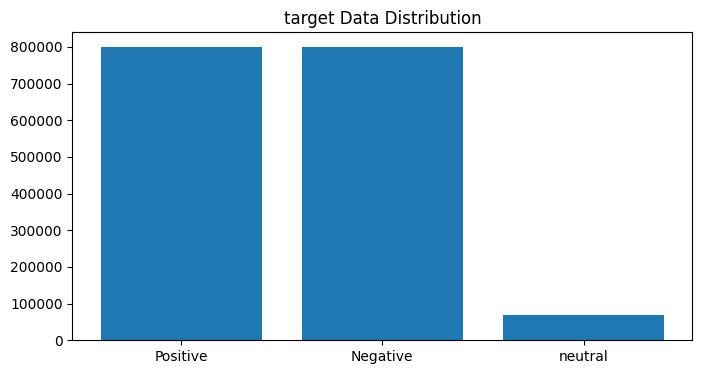

In [ ]:
val_count = all_data_df_shuffled.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("target Data Distribution")

In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'neutral': 0,
    'Positive': 1
}

In [ ]:
all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)

<ipython-input-42-9a7240b2046a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)


In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# 1. Split Data
train_df, temp_df = train_test_split(all_data_df_shuffled, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 69910
Validation set size: 19984
Testing set size: 9978


#Model Training

In [ ]:
# Extract labels
y_train = train_df['sentiment_numeric'].values
# Extract labels
y_val = val_df['sentiment_numeric'].values

## Optimized LSTM Model
First try

In [ ]:
# Save to CSV
all_data_df_shuffled.to_csv('all_data_shuffled.csv', index=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/15
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5770 - f1_score: 0.4303 - loss: 4.3610 - val_accuracy: 0.7498 - val_f1_score: 0.7409 - val_loss: 0.6364 - learning_rate: 2.0000e-04
Epoch 2/15
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7400 - f1_score: 0.7298 - loss: 0.6464 - val_accuracy: 0.7566 - val_f1_score: 0.7517 - val_loss: 0.5999 - learning_rate: 2.0000e-04
Epoch 3/15
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7467 - f1_score: 0.7391 - loss: 0.6129 - val_accuracy: 0.7608 - val_f1_score: 0.7584 - val_loss: 0.5852 - learning_rate: 2.0000e-04
Epoch 4/15
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7467 - f1_score: 0.7401 - loss: 0.6045 - val_accuracy: 0.7546 - val_f1_score: 0.7525 - val_loss: 0.5957 - learning_rate: 2.0000e-04
Epoch 5/15
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7530 - f1_score: 0.7450 - loss: 0.5924 - val_accuracy: 0.7607 - val_f1_score: 0.7578 - val_loss: 0.5774 - learning_rate: 2

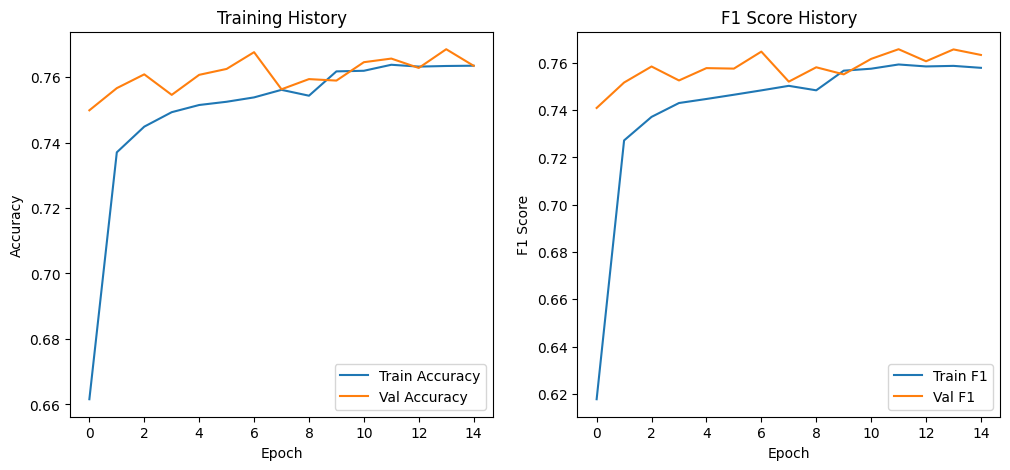

In [ ]:
# Load BERT tokenizer and model (pretrained on uncased English)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Basic config
MAX_LEN = 128
BATCH_SIZE = 64
EPOCHS = 15

# Generate BERT embeddings (CLS token) for input texts
def create_bert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        inputs = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=MAX_LEN,
            return_tensors='tf'
        )
        outputs = bert_model(inputs)
        # Use the [CLS] token's embedding from the last hidden layer
        cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.append(cls_embeddings)
    return np.vstack(embeddings)

# Embed all datasets using BERT
X_train_bert = create_bert_embeddings(train_df['text'].tolist(), BATCH_SIZE)
X_val_bert = create_bert_embeddings(val_df['text'].tolist(), BATCH_SIZE)
X_test_bert = create_bert_embeddings(test_df['text'].tolist(), BATCH_SIZE)

# Convert sentiment labels to one-hot encoding
y_train = pd.get_dummies(train_df['sentiment_numeric']).values
y_val = pd.get_dummies(val_df['sentiment_numeric']).values
y_test = pd.get_dummies(test_df['sentiment_numeric']).values

# Model architecture using BERT + BiLSTM
model = Sequential([
    Input(shape=(768,)),               # BERT embedding size
    Reshape((1, 768)),                 # Add time dimension for LSTM
    Bidirectional(LSTM(
        128,
        return_sequences=True,
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')     # 3 sentiment classes
])

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred)
        self.recall.update_state(y_true, y_pred)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + 1e-6))  # Avoid division by zero

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Compile model with custom F1 and standard settings
model.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', F1Score()]
)

# Set up callbacks for training
callbacks = [
    EarlyStopping(
        patience=5,
        restore_best_weights=True,
        monitor='val_f1_score',
        mode='max'  # We're maximizing F1
    ),
    ReduceLROnPlateau(
        factor=0.5,
        patience=2,
        monitor='val_loss',
        mode='min'
    )
]

# Train the model
history = model.fit(
    X_train_bert,
    y_train,
    validation_data=(X_val_bert, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# Evaluate on test set
y_pred = model.predict(X_test_bert)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Convert predictions back to original sentiment labels
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_mapping = {v: k for k, v in label_mapping.items()}
y_pred_labels = [reverse_mapping[x] for x in y_pred_classes]
y_test_labels = test_df['sentiment_numeric'].values

# Print detailed classification metrics
print("\nClassification Report:")
print(classification_report(
    y_test_labels,
    y_pred_labels,
    target_names=['Negative', 'Neutral', 'Positive']
))

# Plot accuracy and F1 score over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Train F1')
plt.plot(history.history['val_f1_score'], label='Val F1')
plt.title('F1 Score Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

## Optimized LSTM Model
Second try

In [ ]:
### LSTM-Based Text Classification with Pretrained Word Embeddings

# === 1) Load Dataset ===
# Make sure your CSV has at least two columns: 'text' and 'sentiment'
data = pd.read_csv('/content/all_data_shuffled.csv')
texts = data['text'].astype(str).tolist()
labels = data['sentiment'].tolist()

# Encode sentiment labels (e.g., 'positive' -> 2, 'neutral' -> 1, etc.)
lbl_enc = LabelEncoder()
labels_enc = lbl_enc.fit_transform(labels)
num_classes = np.max(labels_enc) + 1

# === 2) Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels_enc, test_size=0.2, random_state=42, stratify=labels_enc
)

# === 3) Tokenization & Padding ===
max_words = 20000     # Maximum number of words in the vocabulary
max_len = 200         # Max sequence length per text
embed_dim = 100       # Dimension of GloVe vectors

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences and pad them to uniform length
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# === 4) Download and Unzip GloVe Embeddings (run only once) ===
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove

--2025-05-30 11:02:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-30 11:02:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-30 11:02:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
# === 5) Load GloVe Embeddings into a Dictionary ===
embedding_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs
print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

# === 6) Create Embedding Matrix ===
word_index = tokenizer.word_index
num_tokens = min(max_words, len(word_index) + 1)

embedding_matrix = np.zeros((num_tokens, embed_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

# === 7) Build the LSTM Model ===
model = Sequential([
    Embedding(
        input_dim=num_tokens,
        output_dim=embed_dim,
        input_length=max_len,
        weights=[embedding_matrix],
        trainable=False  # Set to True if you want to fine-tune GloVe
    ),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# === 8) Train the Model with Callbacks ===
checkpoint_path = '/content/best_model.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# === 9) Evaluate the Model ===
preds = model.predict(X_test_pad)
if num_classes > 2:
    y_pred = np.argmax(preds, axis=1)
else:
    y_pred = (preds > 0.5).astype('int32').reshape(-1)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lbl_enc.classes_))

Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/10
1121/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6125 - loss: 0.7818

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.6127 - loss: 0.7815 - val_accuracy: 0.7581 - val_loss: 0.5396
Epoch 2/10
1121/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7297 - loss: 0.5811

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7298 - loss: 0.5811 - val_accuracy: 0.7752 - val_loss: 0.4953
Epoch 3/10
1122/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7475 - loss: 0.5449

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7475 - loss: 0.5449 - val_accuracy: 0.7814 - val_loss: 0.4815
Epoch 4/10
1123/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7614 - loss: 0.5166

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7614 - loss: 0.5166 - val_accuracy: 0.7892 - val_loss: 0.4657
Epoch 5/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7691 - loss: 0.5000 - val_accuracy: 0.7869 - val_loss: 0.4780
Epoch 6/10
1121/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7742 - loss: 0.4981

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7743 - loss: 0.4980 - val_accuracy: 0.8033 - val_loss: 0.4445
Epoch 7/10
1122/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7847 - loss: 0.4821

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.7847 - loss: 0.4821 - val_accuracy: 0.8000 - val_loss: 0.4429
Epoch 8/10
1122/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7876 - loss: 0.4750

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7876 - loss: 0.4750 - val_accuracy: 0.8041 - val_loss: 0.4380
Epoch 9/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.7854 - loss: 0.4720 - val_accuracy: 0.7859 - val_loss: 0.4864
Epoch 10/10
1123/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7850 - loss: 0.4840

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7850 - loss: 0.4840 - val_accuracy: 0.8094 - val_loss: 0.4315
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Accuracy: 0.8100125156445557
F1-score: 0.8111723460824936
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.76      0.75      6667
    Positive       0.74      0.75      0.74      6667
     neutral       0.96      0.92      0.94      6641

    accuracy                           0.81     19975
   macro avg       0.81      0.81      0.81     19975
weighted avg       0.81      0.81      0.81     19975



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100125156445557


## Optimized LSTM Model
Second try 300k instant

In [ ]:
all_data_df_shuffled

,text,sentiment,sentiment_numeric
0,Found division of power #geocaching,Positive,1
1,@KristenCampisi hi love...Twitter is being wie...,Negative,-1
2,i still feel bitchy then it may stay the whole...,neutral,0
3,modi just did allhands,neutral,0
4,@nialater Exactly! Im just abt to sleep,Negative,-1
...,...,...,...
999994,Wish work would end so I can go swimming too..,Negative,-1
999995,I only went to see this movie when it first hi...,neutral,0
999996,Still very bummed about my job.,Negative,-1
999997,i just cut up one of my many old sweaters that...,Positive,1


In [ ]:
### LSTM-Based Text Classification with Pretrained Word Embeddings

# === 1) Load Dataset ===
# Make sure your CSV has at least two columns: 'text' and 'sentiment'
data = pd.read_csv('/content/all_data_shuffled.csv')
texts = data['text'].astype(str).tolist()
labels = data['sentiment'].tolist()

# Encode sentiment labels (e.g., 'positive' -> 2, 'neutral' -> 1, etc.)
lbl_enc = LabelEncoder()
labels_enc = lbl_enc.fit_transform(labels)
num_classes = np.max(labels_enc) + 1

# === 2) Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels_enc, test_size=0.2, random_state=42, stratify=labels_enc
)

# === 3) Tokenization & Padding ===
max_words = 20000     # Maximum number of words in the vocabulary
max_len = 200         # Max sequence length per text
embed_dim = 100       # Dimension of GloVe vectors

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences and pad them to uniform length
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# === 4) Download and Unzip GloVe Embeddings (run only once) ===
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove

--2025-05-28 11:09:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-28 11:09:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-28 11:09:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# === 5) Load GloVe Embeddings into a Dictionary ===
embedding_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs
print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

# === 6) Create Embedding Matrix ===
word_index = tokenizer.word_index
num_tokens = min(max_words, len(word_index) + 1)

embedding_matrix = np.zeros((num_tokens, embed_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

# === 7) Build the LSTM Model ===
model = Sequential([
    Embedding(
        input_dim=num_tokens,
        output_dim=embed_dim,
        input_length=max_len,
        weights=[embedding_matrix],
        trainable=False  # Set to True if you want to fine-tune GloVe
    ),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# === 8) Train the Model with Callbacks ===
checkpoint_path = '/content/best_model.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# === 9) Evaluate the Model ===
preds = model.predict(X_test_pad)
if num_classes > 2:
    y_pred = np.argmax(preds, axis=1)
else:
    y_pred = (preds > 0.5).astype('int32').reshape(-1)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lbl_enc.classes_))

Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/10
3374/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6952 - loss: 0.6164

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.6952 - loss: 0.6164 - val_accuracy: 0.8079 - val_loss: 0.4175
Epoch 2/10
3373/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7836 - loss: 0.4613

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - accuracy: 0.7836 - loss: 0.4612 - val_accuracy: 0.8212 - val_loss: 0.3945
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7994 - loss: 0.4337

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 79s 19ms/step - accuracy: 0.7994 - loss: 0.4337 - val_accuracy: 0.8283 - val_loss: 0.3783
Epoch 4/10
3373/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8086 - loss: 0.4181

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 86s 21ms/step - accuracy: 0.8086 - loss: 0.4181 - val_accuracy: 0.8339 - val_loss: 0.3692
Epoch 5/10
3373/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8122 - loss: 0.4129

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 87s 22ms/step - accuracy: 0.8122 - loss: 0.4129 - val_accuracy: 0.8357 - val_loss: 0.3634
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8161 - loss: 0.4045

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.8161 - loss: 0.4045 - val_accuracy: 0.8382 - val_loss: 0.3603
Epoch 7/10
3372/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8190 - loss: 0.3969

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.8190 - loss: 0.3969 - val_accuracy: 0.8410 - val_loss: 0.3563
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.8219 - loss: 0.3924 - val_accuracy: 0.8376 - val_loss: 0.3619
Epoch 9/10
3374/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8252 - loss: 0.3865

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.8252 - loss: 0.3865 - val_accuracy: 0.8426 - val_loss: 0.3531
Epoch 10/10
3374/3375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8266 - loss: 0.3861

3375/3375 ━━━━━━━━━━━━━━━━━━━━ 66s 20ms/step - accuracy: 0.8265 - loss: 0.3861 - val_accuracy: 0.8441 - val_loss: 0.3507
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
Accuracy: 0.8398539732284253
F1-score: 0.8405674509036593


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8398539732284253


## Optimized LSTM Model
 100k instant

GPU is available
Starting Simplified LSTM Model Training - simplified_lstm_20250606-174524
Label mapping: {'Negative': 0, 'Positive': 1, 'neutral': 2}
Number of classes: 3

Class distribution:
sentiment
Positive    0.333503
Negative    0.333503
neutral     0.332993
Name: proportion, dtype: float64

Training set size: 69963
Validation set size: 19990
Testing set size: 9995

Preprocessing text data...
Preprocessing completed in 24.07 seconds

Tokenizing and padding sequences...

Class weights: {1: 1.0, 0: 1.0, 2: 1.0015323598341446}
Vocabulary size: 50000


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 200)   │ 10,000,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_1 │ (None, 50, 200)   │          0 │ embedding_1[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 50)        │          0 │ input_layer_1[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 50, 128)   │    135,680 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_attention_1  │ (None, 128)       │        128 │ bidirectional_1[… │
│ (SimpleAttention)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalAveragePool… │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 384)       │          0 │ simple_attention… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │     12,320 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32)        │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │         99 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,148,355 (38.71 MB)

 Trainable params: 10,148,291 (38.71 MB)

 Non-trainable params: 64 (256.00 B)


Training model...
Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7404 - loss: 0.5499
Epoch 1: val_accuracy improved from -inf to 0.84257, saving model to models/simplified_lstm_20250606-174524_best.h5


547/547 ━━━━━━━━━━━━━━━━━━━━ 260s 459ms/step - accuracy: 0.7405 - loss: 0.5497 - val_accuracy: 0.8426 - val_loss: 0.3579 - learning_rate: 5.0000e-04
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8641 - loss: 0.3095
Epoch 2: val_accuracy did not improve from 0.84257
547/547 ━━━━━━━━━━━━━━━━━━━━ 261s 458ms/step - accuracy: 0.8642 - loss: 0.3095 - val_accuracy: 0.8387 - val_loss: 0.3535 - learning_rate: 5.0000e-04
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8952 - loss: 0.2454
Epoch 3: val_accuracy did not improve from 0.84257
547/547 ━━━━━━━━━━━━━━━━━━━━ 251s 460ms/step - accuracy: 0.8952 - loss: 0.2454 - val_accuracy: 0.8334 - val_loss: 0.3908 - learning_rate: 5.0000e-04
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9220 - loss: 0.1903
Epoch 4: val_accuracy did not improve from 0.84257

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
547/547 ━━━━━━━━━━━━━━━━━━━━ 271s 476ms/step - accuracy: 0.


Training completed in 1307.12 seconds (21.79 minutes)
Model saved to models/simplified_lstm_20250606-174524_final.h5

Evaluating model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step

Test Accuracy: 0.8405
Weighted Precision: 0.8405
Weighted Recall: 0.8405
Weighted F1 Score: 0.8400

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7565    0.7969    0.7762      3333
    Positive     0.7888    0.7396    0.7634      3333
     neutral     0.9767    0.9855    0.9811      3319

    accuracy                         0.8405      9985
   macro avg     0.8407    0.8407    0.8402      9985
weighted avg     0.8405    0.8405    0.8400      9985

Confusion matrix saved to plots/confusion_matrix.png
ROC curves saved to plots/roc_curves.png
Training history plot saved to plots/training_history.png

Model training and evaluation complete!
Final test accuracy: 0.8404606910365549
Final weighted F1 score: 0.8400199010435792


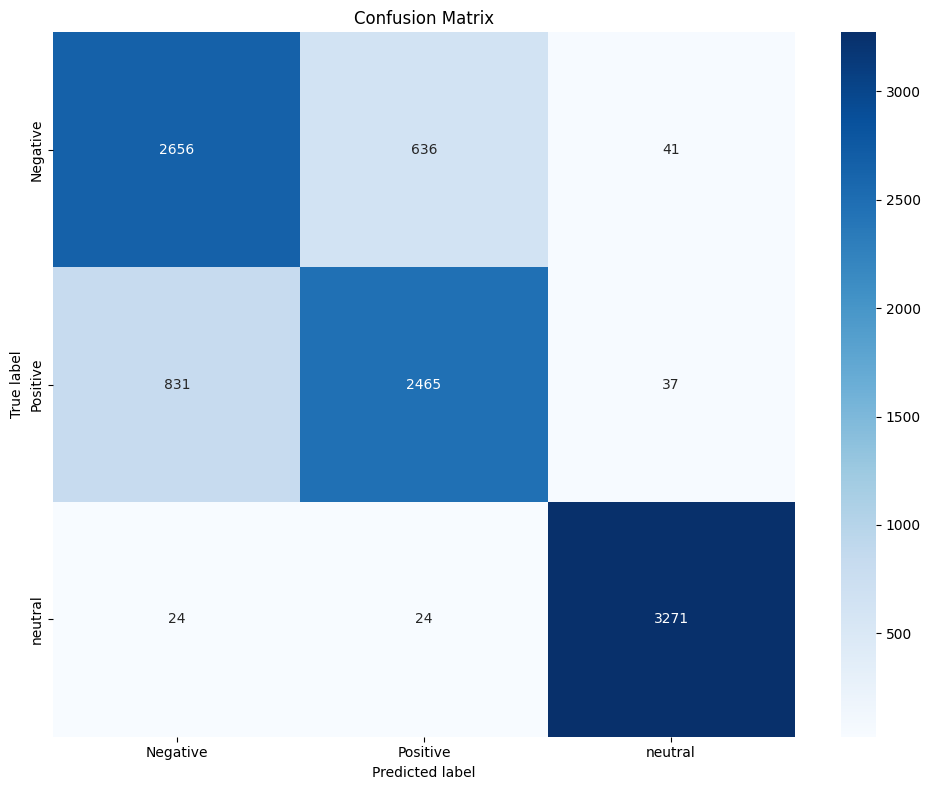

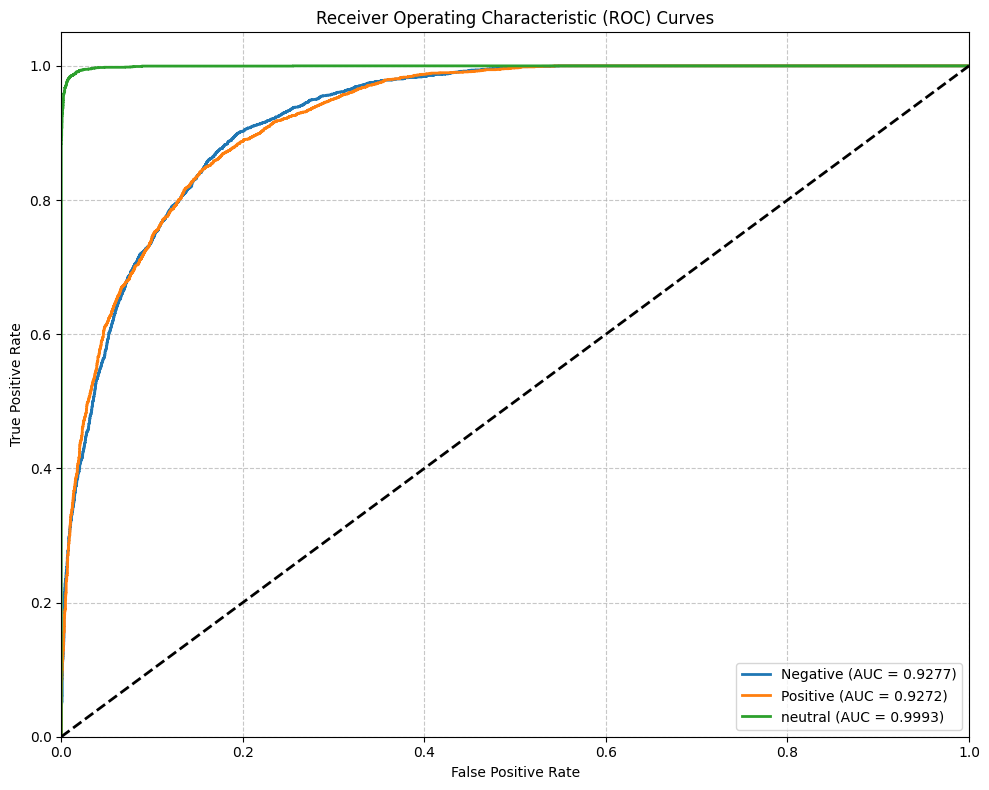

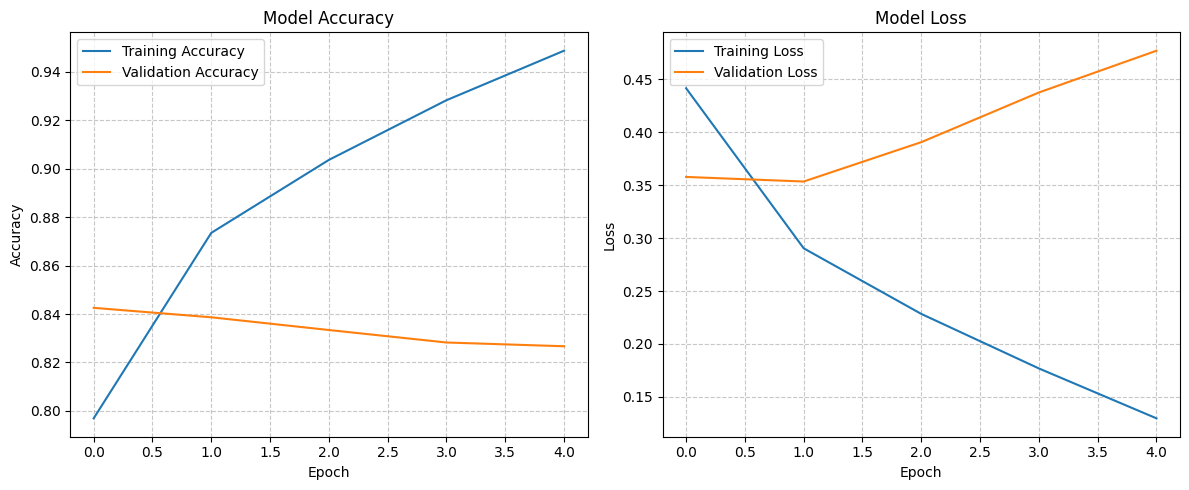

In [ ]:
# Turn off annoying warnings during runtime
warnings.filterwarnings('ignore')

# Make sure NLTK data is available
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Check GPU status
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")

# Set seeds to keep results consistent across runs
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Model config - adjusted for balance and training stability
MAX_FEATURES = 50000     # Limit vocabulary size
MAX_LENGTH = 50          # Cap sequence length for LSTM input
EMBEDDING_DIM = 200      # Size of embedding vectors
BATCH_SIZE = 128         # Larger batch for stability
EPOCHS = 10              # Training epochs
VALIDATION_SPLIT = 0.2
TEST_SPLIT = 0.1
LEARNING_RATE = 5e-4     # Lower LR for more stable training
DROPOUT_RATE = 0.2
LSTM_UNITS = 64
DENSE_UNITS = 32
REMOVE_STOPWORDS = False

# Create a unique name for saving artifacts
TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")
MODEL_NAME = f"simplified_lstm_{TIMESTAMP}"

# Make sure output directories exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

#------------------------------------------------------------------------------
# Simplified Preprocessing Functions
#------------------------------------------------------------------------------

def preprocess_for_lstm(text, remove_stopwords=REMOVE_STOPWORDS):
    """
    Clean and tokenize input text, with an option to remove stopwords.

    Keeps emoticons and punctuation relevant for sentiment. No stemming/lemmatization
    to avoid losing emotional context. Designed specifically for LSTM inputs.
    """
    if not isinstance(text, str) or pd.isna(text) or text.strip() == '':
        return ""

    try:
        stop_words = set(stopwords.words('english')) if remove_stopwords else set()
        stop_words -= {'no', 'not', 'nor', 'neither', 'never', 'none'}  # Keep negations

        # Convert emojis to readable text
        text = emoji.demojize(text)

        # Expand contractions like "don't" -> "do not"
        text = contractions.fix(text)

        # Replace URLs and mentions with generic placeholders
        text = re.sub(r'https?://\S+|www\.\S+', ' URL ', text)
        text = re.sub(r'@\S+', ' USER ', text)

        text = re.sub(r'\s+', ' ', text).lower()

        # Keep emoticons like :) or :(
        emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

        # Remove unwanted characters but keep !?.,
        text = re.sub(r'[^\w\s!?.,]', ' ', text)

        tokens = word_tokenize(text)

        processed_tokens = [
            token for token in tokens
            if token.strip() and token not in stop_words
        ]

        # Add emoticons back at the end
        processed_tokens.extend(emoticons)

        return ' '.join(processed_tokens).strip()

    except Exception as e:
        print(f"Error preprocessing: '{text[:50]}...' — {str(e)}")
        return ""

#------------------------------------------------------------------------------
# Data Loading and Preparation
#------------------------------------------------------------------------------

def load_and_prepare_data(csv_path=None, df=None, text_column='text', sentiment_column='sentiment'):

    # Load data
    if df is not None:
        all_data = df.copy()
    elif csv_path:
        try:
            all_data = pd.read_csv(csv_path)
        except Exception as e:
            print(f"Error loading CSV file: {str(e)}")
            print("Using sample data instead...")
            # Create sample data
            all_data = pd.DataFrame({
                text_column: [
                    "I love this product, it's amazing!",
                    "This is terrible, I hate it.",
                    "It's okay, nothing special.",
                    "Best purchase ever, highly recommend!",
                    "Worst experience of my life, avoid at all costs.",
                    "Neutral opinion, could be better or worse."
                ],
                sentiment_column: [
                    "Positive", "Negative", "neutral",
                    "Positive", "Negative", "neutral"
                ]
            })
    else:
        raise ValueError("Either df or csv_path must be provided")

    # Check if columns exist
    if text_column not in all_data.columns:
        raise ValueError(f"Text column '{text_column}' not found in DataFrame. Available columns: {all_data.columns.tolist()}")

    if sentiment_column not in all_data.columns:
        raise ValueError(f"Sentiment column '{sentiment_column}' not found in DataFrame. Available columns: {all_data.columns.tolist()}")

    # Drop rows with missing values
    all_data = all_data.dropna(subset=[text_column, sentiment_column])

    # Create label mapping
    unique_labels = all_data[sentiment_column].unique()
    label_mapping = {label: i for i, label in enumerate(sorted(unique_labels))}
    num_classes = len(label_mapping)

    print(f"Label mapping: {label_mapping}")
    print(f"Number of classes: {num_classes}")

    # Apply label mapping
    all_data['label_numeric'] = all_data[sentiment_column].map(label_mapping)

    # Check class distribution
    print("\nClass distribution:")
    class_distribution = all_data[sentiment_column].value_counts(normalize=True)
    print(class_distribution)

    # Split data
    train_df, temp_df = train_test_split(all_data, test_size=VALIDATION_SPLIT + TEST_SPLIT, random_state=SEED, stratify=all_data[sentiment_column])
    val_df, test_df = train_test_split(temp_df, test_size=TEST_SPLIT/(VALIDATION_SPLIT + TEST_SPLIT), random_state=SEED, stratify=temp_df[sentiment_column])

    print(f"\nTraining set size: {len(train_df)}")
    print(f"Validation set size: {len(val_df)}")
    print(f"Testing set size: {len(test_df)}")

    # Preprocess text
    print("\nPreprocessing text data...")
    start_time = time.time()

    train_df['processed_text'] = train_df[text_column].apply(preprocess_for_lstm)
    val_df['processed_text'] = val_df[text_column].apply(preprocess_for_lstm)
    test_df['processed_text'] = test_df[text_column].apply(preprocess_for_lstm)

    print(f"Preprocessing completed in {time.time() - start_time:.2f} seconds")

    # Remove empty processed texts
    train_df = train_df[train_df['processed_text'].str.len() > 0]
    val_df = val_df[val_df['processed_text'].str.len() > 0]
    test_df = test_df[test_df['processed_text'].str.len() > 0]

    # Tokenize and pad sequences
    print("\nTokenizing and padding sequences...")
    tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
    tokenizer.fit_on_texts(train_df['processed_text'])

    train_sequences = tokenizer.texts_to_sequences(train_df['processed_text'])
    val_sequences = tokenizer.texts_to_sequences(val_df['processed_text'])
    test_sequences = tokenizer.texts_to_sequences(test_df['processed_text'])

    # Determine max length based on data
    actual_max_length = min(
        MAX_LENGTH,
        max([len(seq) for seq in train_sequences + val_sequences + test_sequences])
    )

    train_padded = pad_sequences(train_sequences, maxlen=actual_max_length, padding='post', truncating='post')
    val_padded = pad_sequences(val_sequences, maxlen=actual_max_length, padding='post', truncating='post')
    test_padded = pad_sequences(test_sequences, maxlen=actual_max_length, padding='post', truncating='post')

    # Convert labels
    train_labels = to_categorical(train_df['label_numeric'], num_classes=num_classes)
    val_labels = to_categorical(val_df['label_numeric'], num_classes=num_classes)
    test_labels = to_categorical(test_df['label_numeric'], num_classes=num_classes)

    # Calculate class weights for imbalanced data
    class_weights = {}
    class_counts = all_data['label_numeric'].value_counts().to_dict()
    max_count = max(class_counts.values())

    for label, count in class_counts.items():
        class_weights[label] = max_count / count

    print(f"\nClass weights: {class_weights}")

    # Vocabulary size
    vocab_size = min(MAX_FEATURES, len(tokenizer.word_index) + 1)
    print(f"Vocabulary size: {vocab_size}")

    return (
        train_padded, train_labels,
        val_padded, val_labels,
        test_padded, test_labels,
        label_mapping, tokenizer, actual_max_length,
        vocab_size, num_classes, class_weights
    )

#------------------------------------------------------------------------------
# Simplified Model Architecture
#------------------------------------------------------------------------------

# Simple Attention Layer compatible with all Keras versions
class SimpleAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SimpleAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="attention_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        super(SimpleAttention, self).build(input_shape)

    def call(self, inputs):
        # inputs shape: (batch_size, seq_len, features)

        # Attention scores - using Keras backend operations
        e = tf.keras.backend.tanh(tf.keras.backend.dot(inputs, self.W))
        e = tf.keras.backend.squeeze(e, axis=-1)

        # Attention weights
        alpha = tf.keras.backend.softmax(e, axis=1)
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)

        # Context vector
        context = inputs * alpha
        context = tf.keras.backend.sum(context, axis=1)

        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[2])

def build_simplified_lstm_model(vocab_size, max_length, num_classes, embedding_dim=EMBEDDING_DIM):

    # Input layer
    inputs = Input(shape=(max_length,))

    # Embedding layer with spatial dropout
    x = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_length,
        mask_zero=True
    )(inputs)
    x = SpatialDropout1D(DROPOUT_RATE)(x)

    # Single Bidirectional LSTM layer
    lstm = Bidirectional(
        LSTM(
            LSTM_UNITS,
            return_sequences=True,
            dropout=DROPOUT_RATE,
            recurrent_dropout=DROPOUT_RATE/2
        )
    )(x)

    # Feature extraction with attention and pooling
    attention_output = SimpleAttention()(lstm)
    max_pool = GlobalMaxPooling1D()(lstm)
    avg_pool = GlobalAveragePooling1D()(lstm)

    # Concatenate different features
    concat = Concatenate()([attention_output, max_pool, avg_pool])

    # Single dense layer with dropout
    x = Dense(DENSE_UNITS)(concat)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(DROPOUT_RATE)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model with standard categorical crossentropy
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#------------------------------------------------------------------------------
# Training and Evaluation
#------------------------------------------------------------------------------

def train_model(
    train_data, train_labels,
    val_data, val_labels,
    vocab_size, max_length, num_classes,
    class_weights=None
):

    # Build model
    model = build_simplified_lstm_model(vocab_size, max_length, num_classes)
    model.summary()

    # Create model directory if it doesn't exist
    os.makedirs('models', exist_ok=True)

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            filepath=f'models/{MODEL_NAME}_best.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            min_lr=1e-6,
            verbose=1
        )
    ]

    # Train model
    print("\nTraining model...")
    start_time = time.time()

    history = model.fit(
        train_data, train_labels,
        validation_data=(val_data, val_labels),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

    # Save final model
    try:
        model.save(f'models/{MODEL_NAME}_final.h5')
        print(f"Model saved to models/{MODEL_NAME}_final.h5")
    except Exception as e:
        print(f"Warning: Could not save model: {str(e)}")

    return model, history

def evaluate_model(model, test_data, test_labels, label_mapping):

    print("\nEvaluating model on test data...")

    # Predict on test data
    y_pred_proba = model.predict(test_data)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print(f"\nTest Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1 Score: {f1:.4f}")

    # Detailed classification report
    target_names = [k for k, v in sorted(label_mapping.items(), key=lambda item: item[1])]
    report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
    print("\nClassification Report:")
    print(report)

    # Ensure directories exist
    os.makedirs('models', exist_ok=True)
    os.makedirs('plots', exist_ok=True)

    # Save classification report to file
    try:
        with open(f'models/{MODEL_NAME}_report.txt', 'w') as f:
            f.write(f"Test Accuracy: {accuracy:.4f}\n")
            f.write(f"Weighted Precision: {precision:.4f}\n")
            f.write(f"Weighted Recall: {recall:.4f}\n")
            f.write(f"Weighted F1 Score: {f1:.4f}\n\n")
            f.write("Classification Report:\n")
            f.write(report)
    except Exception as e:
        print(f"Warning: Could not save report: {str(e)}")

    # Plot confusion matrix
    try:
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names
        )
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.savefig('plots/confusion_matrix.png', dpi=300, bbox_inches='tight')
        print("Confusion matrix saved to plots/confusion_matrix.png")
    except Exception as e:
        print(f"Warning: Could not save confusion matrix plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names
        )
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

    # Plot ROC curves for multi-class
    try:
        plt.figure(figsize=(10, 8))

        # One-vs-Rest ROC curves
        for i, class_name in enumerate(target_names):
            # Binarize the output
            y_true_bin = (y_true == i).astype(int)
            y_pred_proba_bin = y_pred_proba[:, i]

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba_bin)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.4f})')

        # Plot random guessing line
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('plots/roc_curves.png', dpi=300, bbox_inches='tight')
        print("ROC curves saved to plots/roc_curves.png")
    except Exception as e:
        print(f"Warning: Could not save ROC curves plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(10, 8))

        # One-vs-Rest ROC curves
        for i, class_name in enumerate(target_names):
            # Binarize the output
            y_true_bin = (y_true == i).astype(int)
            y_pred_proba_bin = y_pred_proba[:, i]

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba_bin)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.4f})')

        # Plot random guessing line
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Return metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'report': report,
        'confusion_matrix': cm
    }

    return metrics

def plot_training_history(history):

    # Ensure directory exists
    os.makedirs('plots', exist_ok=True)

    try:
        # Plot accuracy
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.savefig('plots/training_history.png', dpi=300, bbox_inches='tight')
        print("Training history plot saved to plots/training_history.png")
    except Exception as e:
        print(f"Warning: Could not save training history plot: {str(e)}")
        # Display in notebook anyway
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

    # Plot learning rate if available
    if 'lr' in history.history:
        try:
            plt.figure(figsize=(10, 5))
            plt.plot(history.history['lr'])
            plt.title('Learning Rate')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig('plots/learning_rate.png', dpi=300, bbox_inches='tight')
            print("Learning rate plot saved to plots/learning_rate.png")
        except Exception as e:
            print(f"Warning: Could not save learning rate plot: {str(e)}")
            # Display in notebook anyway
            plt.figure(figsize=(10, 5))
            plt.plot(history.history['lr'])
            plt.title('Learning Rate')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

#------------------------------------------------------------------------------
# Main Function
#------------------------------------------------------------------------------

def main(df=None, csv_path=None, text_column='text', sentiment_column='sentiment'):

    print("=" * 80)
    print(f"Starting Simplified LSTM Model Training - {MODEL_NAME}")
    print("=" * 80)

    # Create necessary directories
    os.makedirs('models', exist_ok=True)
    os.makedirs('plots', exist_ok=True)

    # Load and prepare data
    try:
        (
            train_data, train_labels,
            val_data, val_labels,
            test_data, test_labels,
            label_mapping, tokenizer, max_length,
            vocab_size, num_classes, class_weights
        ) = load_and_prepare_data(
            csv_path=csv_path,
            df=df,
            text_column=text_column,
            sentiment_column=sentiment_column
        )
    except Exception as e:
        print(f"Error in data preparation: {str(e)}")
        raise

    # Train model
    try:
        model, history = train_model(
            train_data, train_labels,
            val_data, val_labels,
            vocab_size, max_length, num_classes,
            class_weights
        )
    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

    # Evaluate model
    try:
        metrics = evaluate_model(model, test_data, test_labels, label_mapping)
    except Exception as e:
        print(f"Error in model evaluation: {str(e)}")
        metrics = {"error": str(e)}

    # Plot training history
    try:
        plot_training_history(history)
    except Exception as e:
        print(f"Error in plotting training history: {str(e)}")

    print("\nModel training and evaluation complete!")
    print(f"Final test accuracy: {metrics.get('accuracy', 'N/A')}")
    print(f"Final weighted F1 score: {metrics.get('f1', 'N/A')}")

    # Save tokenizer for future use
    try:
        import pickle
        with open(f'models/{MODEL_NAME}_tokenizer.pickle', 'wb') as handle:
            pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

        # Save label mapping
        with open(f'models/{MODEL_NAME}_label_mapping.pickle', 'wb') as handle:
            pickle.dump(label_mapping, handle, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print(f"Warning: Could not save tokenizer or label mapping: {str(e)}")

    return model, metrics, history

#------------------------------------------------------------------------------
# Example Usage
#------------------------------------------------------------------------------

if __name__ == "__main__":

    csv_path = "/content/all_data_shuffled.csv"

    # Run the pipeline
    model, metrics, history = main(
        csv_path=csv_path,
        text_column='text',
        sentiment_column='sentiment'
    )
